In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.naver as web_naver

데이터 병합


In [2]:
result1=pd.read_csv('result_mod1.csv',index_col=0)
result2=pd.read_csv('result_mod2.csv',index_col=0)
result1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 2020-07-02 to 2022-01-21
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tiger_close  375 non-null    float64
 1   pred         375 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.8+ KB


In [3]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 2021-01-04 to 2022-01-21
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kodex_close  254 non-null    float64
 1   pred         254 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.0+ KB


In [4]:
df_tiger=web_naver.NaverDailyReader(symbols='137610', start='20200702',adjust_price=True)
df_kodex=web_naver.NaverDailyReader(symbols='271060', start='20210104',adjust_price=True)

In [5]:
df_tiger=df_tiger.read()
df_kodex=df_kodex.read()


In [6]:
df_tiger=df_tiger.astype(float)
df_kodex=df_kodex.astype(float)

In [15]:
df_tiger.index,result1.index = pd.to_datetime(df_tiger.index),pd.to_datetime(result1.index)
df_kodex.index,result2.index=pd.to_datetime(df_kodex.index),pd.to_datetime(result2.index)

In [7]:
"""
df_tiger.index = pd.to_datetime(df_tiger.index)
result1.index=pd.to_datetime(result1.index)
df_kodex.index = pd.to_datetime(df_kodex.index)
result2.index=pd.to_datetime(result2.index)"""

In [8]:


df_tiger=pd.concat([df_tiger,result1],axis=1)
df_tiger.dropna(inplace=True)
df_tiger

,Open,High,Low,Close,Volume,tiger_close,pred
Date,,,,,,,
2020-07-02,4080.0,4120.0,4080.0,4110.0,41901.0,-1.398068,1.0
2020-07-06,4080.0,4120.0,4080.0,4080.0,51873.0,-1.413933,1.0
2020-07-07,4100.0,4110.0,4070.0,4085.0,18914.0,-1.411289,1.0
2020-07-08,4080.0,4090.0,4070.0,4085.0,13456.0,-1.411289,1.0
2020-07-09,4105.0,4125.0,4100.0,4120.0,35266.0,-1.392779,1.0
...,...,...,...,...,...,...,...
2022-01-14,6805.0,6805.0,6635.0,6650.0,11895.0,-0.054782,1.0
2022-01-18,6685.0,6700.0,6660.0,6665.0,10762.0,-0.046849,-1.0
2022-01-19,6690.0,6795.0,6690.0,6790.0,20236.0,0.019258,-1.0


In [9]:
df_kodex=pd.concat([df_kodex,result2],axis=1)
df_kodex.dropna(inplace=True)
df_kodex

,Open,High,Low,Close,Volume,kodex_close,pred
Date,,,,,,,
2021-01-04,9350.0,9650.0,9335.0,9625.0,76109.0,0.578147,1.0
2021-01-05,9560.0,9565.0,9465.0,9545.0,51776.0,0.533887,1.0
2021-01-06,9570.0,9790.0,9570.0,9785.0,67261.0,0.666667,1.0
2021-01-07,9780.0,9780.0,9655.0,9715.0,72898.0,0.627939,1.0
2021-01-08,9715.0,9715.0,9590.0,9710.0,63291.0,0.625173,1.0
...,...,...,...,...,...,...,...
2022-01-14,11295.0,11300.0,11160.0,11200.0,4723.0,1.449516,-1.0
2022-01-18,11340.0,11360.0,11180.0,11200.0,10743.0,1.449516,1.0
2022-01-19,11320.0,11450.0,11250.0,11430.0,9340.0,1.576763,1.0


수익률 계산

In [10]:
df_tiger['close_1']=df_tiger['Close'].shift(1)
df_tiger['return']=np.log(df_tiger['Close']/df_tiger['close_1'])


df_kodex['close_1']=df_kodex['Close'].shift(1)
df_kodex['return']=np.log(df_kodex['Close']/df_kodex['close_1'])

In [16]:
df_tiger['strategy']=df_tiger['return']*df_tiger['pred']*(1-0.00215)
df_kodex['strategy']=df_kodex['return']*df_kodex['pred']*(1-0.00215)

print('tiger etf 수익률: {}'.format(df_tiger[['return','strategy']].sum().apply(np.exp)))
print('kodex etf 수익률: {}'.format(df_kodex[['return','strategy']].sum().apply(np.exp)))





tiger etf 수익률: return      1.671533
strategy    2.814908
dtype: float64
kodex etf 수익률: return      1.206234
strategy    1.259281
dtype: float64


<AxesSubplot:xlabel='Date'>

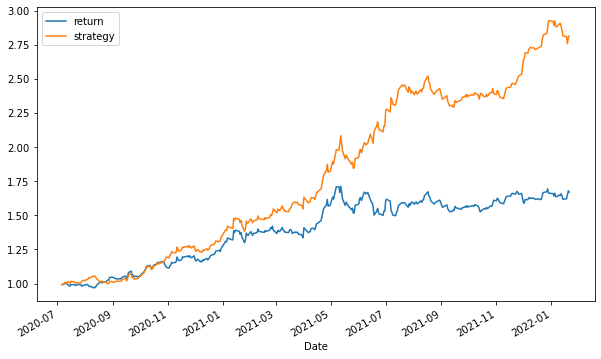

In [17]:
df_tiger[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))


<AxesSubplot:xlabel='Date'>

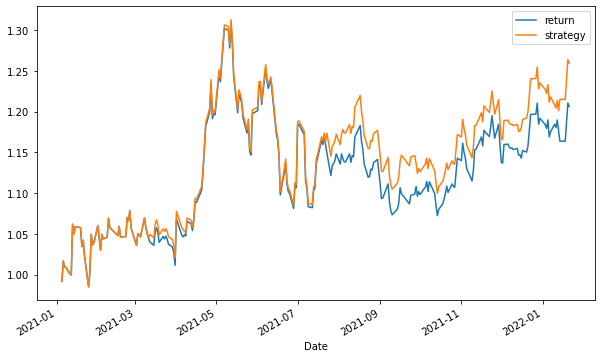

In [18]:
df_kodex[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
